Adult census data from 1996
======

In this notebook we will have a look at the [census income data from 1996](http://archive.ics.uci.edu/ml/datasets/Census+Income). The dataset can be found is part of the [UC Irvines ML repository](http://archive.ics.uci.edu/ml/). Specifically the data can be found at http://archive.ics.uci.edu/ml/machine-learning-databases/adult/.

Python imports
------

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rc_params_from_file("../styles/matplotlibrc" ).update()

Data cleaning importing an munging
------

The data is a set of csv files that have been split into a training set and test set already. To support easy read in to a pandas DF we preprocess the files by adding a header that we get from the datasets metadata and adding an index column

In [2]:
import csv

def indexAndAnnotateDataSet(filename):
    outname = filename.replace('.csv', '_clean.csv')
    with open(outname, 'wb') as csvfile:
        f = open(filename,'r')
        filewriter = csv.writer(csvfile, delimiter=',')
        columns = ['', 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']
        filewriter.writerow(columns)
        idx = 0
        for line in f:
            lst = []
            lst.append(str(idx))
            for item in line.strip('.').split(','):
                lst.append(item.strip().strip('.'))

            filewriter = csv.writer(csvfile, delimiter=',')
            filewriter.writerow(lst)
            idx +=1
        f.close()
    return outname

Since the datasets are fairly small we download them here

In [3]:
import os
import urllib


url_train_dataset = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
urllib.urlretrieve(url_train_dataset, 'adult.csv')

url_test_dataset = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
urllib.urlretrieve(url_test_dataset, 'adult_test.csv')

clean_DS_1 = indexAndAnnotateDataSet(os.getcwd() +'/adult.csv')
clean_DS_2 = indexAndAnnotateDataSet(os.getcwd() +'/adult_test.csv')

We will use scikit-learn's built-in cross-validation methodes. Hence, we join the training and test data into a larger data frame to increase the size of the dataset. Moreover, we will drop rows that contain `na` feature and the column called 'fnlwgt' as this is a control value introduced by the original authors of the dataset.

Inhaling the csv files and appending the data frames we get:

In [75]:
raw_data_df = pd.DataFrame.from_csv(clean_DS_1).dropna().drop('fnlwgt',1)
raw_test_df = pd.DataFrame.from_csv(clean_DS_2).dropna().drop('fnlwgt',1)
raw_data_df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Looking at the 'education' and 'education-num' column we might suspect duplicate information. Let's check for that!

In [45]:
raw_data_df[['education', 'education-num']].drop_duplicates().sort('education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


As suspected the two columns are mere duplicates of each other to cast the strings into integer categoricals. In the following we will drop the 'education' column.

Parsing the categoricals to integers
------

All scikit-learn classification algorithms expect numerical features as input. We will hence cast the categoricals to integers and keep the lists areound to resolve classes later on if necessary.

In [46]:
list_of_catList= []
list_of_catList.append(raw_data_df.workclass.unique())
list_of_catList.append(raw_data_df['marital-status'].unique())
list_of_catList.append(raw_data_df.occupation.unique())
list_of_catList.append(raw_data_df.relationship.unique())
list_of_catList.append(raw_data_df.race.unique())
list_of_catList.append(raw_data_df.sex.unique())
list_of_catList.append(raw_data_df['native-country'].unique())

def cleanFeatureDF(feature_df):
    df = feature_df
    for lst in list_of_catList:
        for cat in lst:
            df = df.replace(cat, lst.tolist().index(cat))
    return df

def cleanTargetDF(target_df):
    df = target_df
    list_of_target = target_df.unique()
    for target in list_of_target:
        df = df.replace(target, list_of_target.tolist().index(target))
    return df

In [76]:
numerical_data_df = cleanFeatureDF(raw_data_df.drop('target',1).drop('education',1))
numerical_data_df['target'] = cleanTargetDF(raw_data_df.target)

numerical_test_df = cleanFeatureDF(raw_test_df.drop('target',1).drop('education',1))
numerical_test_df['target'] = cleanTargetDF(raw_test_df.target)

Feeding the learning algorithms
------

As we are dealing with a very dense dataset containing mostly categoricals we might assume that tree classifiers should do well on this problem, so we will look into training a simple tree and a random forest.

But before that we need to split our data frame into training features and the target variables:

In [48]:
train_feature_df = numerical_data_df.drop('target',1)
train_target_df = numerical_data_df.target

###Learning a tree

Let's learn a simple tree using scikit-learn's [tree classifier](http://scikit-learn.org/stable/modules/tree.html#classification)

In [49]:
import numpy as np
from sklearn import tree
from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve

In [50]:
tree_clf = tree.DecisionTreeClassifier()

First we are interested how the naive tree is doing in learning our training set. To this end we record the learning curve of our dataset

In [51]:
def plotLearningCurve(classifier, feature_df, target_df, train_set_sizes):
    train_sizes, train_scores, test_scores = learning_curve(classifier,
                                                            feature_df,
                                                            target_df,
                                                            train_sizes=train_set_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

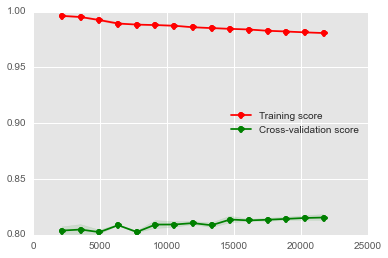

In [52]:
train_sizes=np.linspace(.1, 1.0, 15)
plotLearningCurve(tree_clf, train_feature_df, train_target_df, train_sizes)

Our learning curve is pretty bad. The scores almost don't change at all with varying the data set size. Moreover the curve shows a large gap which hints to a large bias or overfitting of the data set. To improve on the learning we need to investigate the hyper-parameter space for the tree, which in this case is the tree depth. scikit-learn's tree does not impose any maximal tree depth, so let's look at the validation curves using 'accuracy' as a score in the dpeth hyper-parameter space

In [53]:
def plotValidationAccuracyCurve(classifier, feature_df, target_df, param_name, param_range):
    train_scores, test_scores = validation_curve(classifier,
                                                 feature_df,
                                                 target_df,
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=10,
                                                 scoring="accuracy",
                                                 n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_scores_mean, 'o-', label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(param_range, test_scores_mean, 'o-', label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")

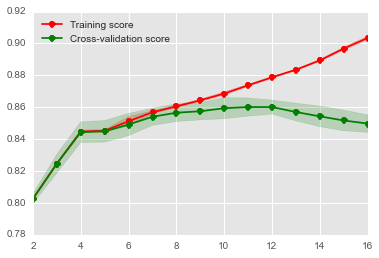

In [54]:
param_range = range(2,17)
plotValidationAccuracyCurve(tree_clf, train_feature_df, train_target_df, 'max_depth', param_range)

Indeed we see a sweet spot at around depth 12, after which the cross-validation score starts to drop. We will fix the classifier at depth 12 and learn the final classifier

In [55]:
tree_clf.max_depth = 12
tree_clf.fit(train_feature_df, train_target_df)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=12, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

###Training a Random Forest

RFs have the advantage that their inherent randomness counter-acts the learning of train-set intrisic patterns which don't generalize. They tend not to overfit and are stable against outliers.

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_clf = RandomForestClassifier()

Let's start with having a look at their learning behavior

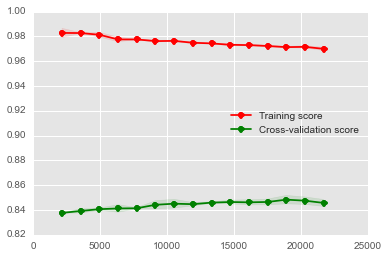

In [61]:
train_sizes=np.linspace(.1, 1.0, 15)
plotLearningCurve(rf_clf, train_feature_df, train_target_df, train_sizes)

We face the same problems as with the single tree, hence we need to dig into the hyper-parameter space. We explore the maximal depth and the number of trees in the forest.

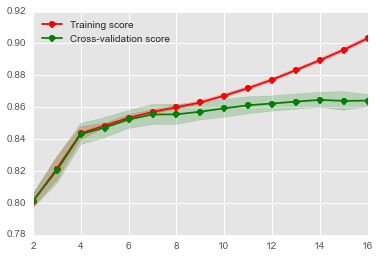

In [65]:
#Validation curve to find optimal max_depth of trees
param_range = range(2,17)
plotValidationAccuracyCurve(rf_clf, train_feature_df, train_target_df, 'max_depth', param_range)

We find the optimal value at around depth 14. Let's look for the optimal forest size at that maximal depth (Note: we might only find a local optimum or non at all. To find an actual optimal point we would need a grid search in hyper-parameter space)

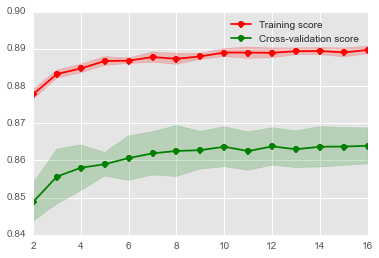

In [66]:
#Validation curve to find optimal number of trees
param_range = range(2,17)
rf_clf.max_depth = 14
plotValidationAccuracyCurve(rf_clf, train_feature_df, train_target_df, 'n_estimators', param_range)

We see that around a number of 9 trees the scores start to saturate, so we can choose this value as a sweet spot. Let's see how our learning curve looks at this point in hyper-parameter space

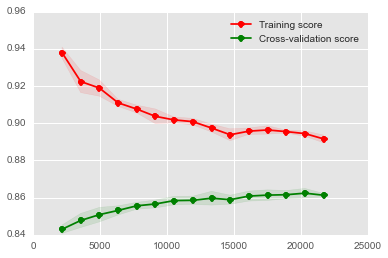

In [71]:
train_sizes=np.linspace(.1, 1.0, 15)
rf_clf.max_depth = 14
rf_clf.n_estimators = 9
plotLearningCurve(rf_clf, train_feature_df, train_target_df, train_sizes)

Much better! We see that the curves are starting to converge and haven't saturated yet. We hence reduced our bias and it seems that increasing the data-set size might even improve our classifier.

Finally let's learn the final RF classifier

In [72]:
rf_clf.max_depth = 14
rf_clf.n_estimators = 9
rf_clf.fit(train_feature_df, train_target_df)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=9, n_jobs=1, oob_score=False,
            random_state=None, verbose=0)

Interpreting the models
------

To understand the differences in the model of a random forest vs. the single tree let us try to interpret their predictions.

### Performance on the test set
A first step is to see how well the two models do on the test set using various scores

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [87]:
tree_prediction = tree_clf.predict(numerical_test_df.drop('target',1))
tree_confusion_matrix = confusion_matrix(numerical_test_df.target, tree_prediction)
tree_accuracy = accuracy_score(numerical_test_df.target, tree_prediction)

rf_prediction = rf_clf.predict(numerical_test_df.drop('target',1))
rf_confusion_matrix = confusion_matrix(numerical_test_df.target, rf_prediction)
rf_accuracy = accuracy_score(numerical_test_df.target, rf_prediction)

print "Tree accuracy: %0.3f" % tree_accuracy
print "RF accuracy: %0.3f" % rf_accuracy
print "\n"
print "Tree confusion matrix: \n", tree_confusion_matrix
print "RF confusion matrix: \n", rf_confusion_matrix

Tree accuracy: 0.899
RF accuracy: 0.886


Tree confusion matrix: 
[[23621  1099]
 [ 2198  5643]]
RF confusion matrix: 
[[23803   917]
 [ 2810  5031]]


We see that the single tree is slighlty more accurate, but that both classifiers perform close to 90% accurate. Looking at the confusion matrix it becomes obvious that the RF is more careful in classifying positives as the total number of false positives is smaller. Let's look at some more metrics to draw a final conclusion

In [92]:
print "Tree precision: %0.3f" % precision_score(numerical_test_df.target, tree_prediction)
print "RF precision: %0.3f" % precision_score(numerical_test_df.target, rf_prediction)
print "\n"
print "Tree recall: %0.3f" % recall_score(numerical_test_df.target, tree_prediction)
print "RF recall: %0.3f" % recall_score(numerical_test_df.target, rf_prediction)

Tree precision: 0.837
RF precision: 0.846


Tree recall: 0.720
RF recall: 0.642


As already suspected. The RF is more precise than the single tree in terms of assiging the correct class. However the single tree is outperforming the RF in terms of finding true positives in the data.

###Features of the classifiers?

Finally it is important to understand what features the classifiers learned. In the case of our linear model this will still be easier to interpret. Let's have a look at the `feature_importances_` of the classifiers.

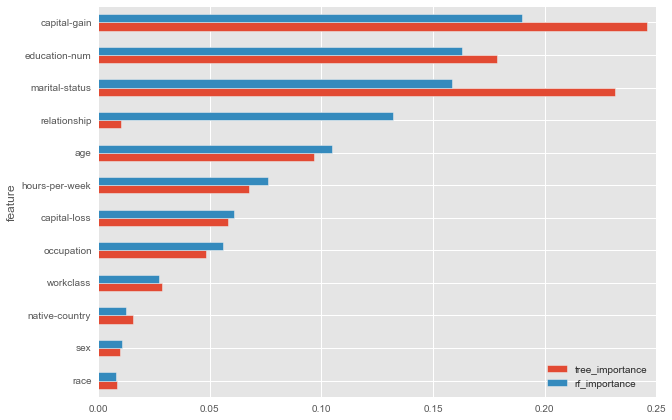

In [99]:
feature_imp_df = pd.DataFrame()
feature_imp_df['feature'] = train_feature_df.columns
feature_imp_df['tree_importance'] = tree_clf.feature_importances_/tree_clf.feature_importances_.sum()
feature_imp_df['rf_importance'] = rf_clf.feature_importances_/rf_clf.feature_importances_.sum()
feature_imp_df.sort('rf_importance', ascending = True).plot(x='feature', kind='barh', figsize=(10,7))

We immediately see that the tree as well as the RF share the three most important features 'capital-gain', 'education-num' and 'marital-status' to be indicative of whether or not the income is larger than 50K. However the single tree places slightly more importance on those features than the RF which might be connected to some overfitting due to missing randomness that the RF has. Hover the 4th feature is interesting! RF indicates that 'relationship' is a strong indicator of large income, whereas the single tree completely dismisses this feature as unimportant.

Let's look at this feature in more detail!

['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


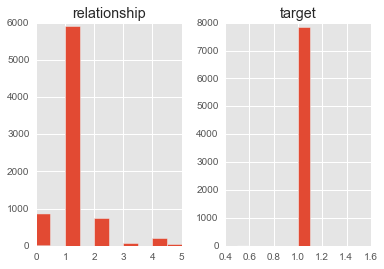

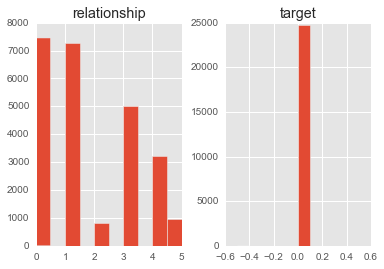

In [124]:
marital_status_list = list_of_catList[3]
df_to_plot = numerical_data_df[['relationship','target']]

df_to_plot[df_to_plot.target ==1].hist()
df_to_plot[df_to_plot.target ==0].hist()
print marital_status_list

We see that this is indeed a feature! Not being in the relationship status 'Husband' significantly decreases your chance of making more than 50K a year! Husband's themselves are relatively safe since their status appears mostly uncorrelated with the money they earn. Intuitively it is clear that RF could pick this up since every tree in the forest might split on a different value of the 'relationship' category and the final voting will outweight the insignificant 'husband' value.

Summary
------

Though the analysis done here is fairly trivial it turns out that using two simple classifiers we are already able to gain insight into a interesting feature. Namley that not being in a relationship status 'Husband' significantly reduces the chances of making more than 50K of income a year. For husbands themselves however, the status is non-decisive. THe feature was detected using a Random Forest classifier but could not be picked up using a single Decision tree.

I hope you find this notebook useful and it motivates you to play some more with it. Contributions are always welcome!

###Miscellenea

####References
are mostly given throughout the text. But importantly

- [1] [scikit-learn](http://scikit-learn.org/stable/index.html)

####Stylesheet

In [125]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()